<a href="https://colab.research.google.com/github/arya-datax/Employee-Salary-Prediction-Model-LR/blob/main/Employee_salaray_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [ ]:
df = pd.read_csv('/content/Employers_data.csv')

In [ ]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [ ]:
df.duplicated().sum()

np.int64(0)

# **1. Undestanding and preparing Data**

In [ ]:
df.shape

(10000, 10)

In [ ]:
df = df.drop(columns = ['Employee_ID','Name'])

In [ ]:
df.head()

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,56,Male,Sales,Executive,33,Master,Seattle,195000
2,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,25,Female,HR,Analyst,2,Master,Seattle,70000


In [ ]:
df.describe()

,Age,Experience_Years,Salary
count,10000.000000,10000.000000,10000.000000
mean,35.455900,12.370900,115381.500000
std,10.000213,9.148951,46066.139047
min,21.000000,0.000000,25000.000000
25%,27.000000,5.000000,70000.000000
50%,34.000000,10.000000,120000.000000
75%,43.000000,19.000000,150000.000000
max,60.000000,37.000000,215000.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Department,0
Job_Title,0
Experience_Years,0
Education_Level,0
Location,0
Salary,0


In [ ]:
df.duplicated().sum()

np.int64(3157)

# 2. EDA

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

numeric_df.corr()

,Age,Experience_Years,Salary
Age,1.000000,0.982299,0.927958
Experience_Years,0.982299,1.000000,0.898025
Salary,0.927958,0.898025,1.000000


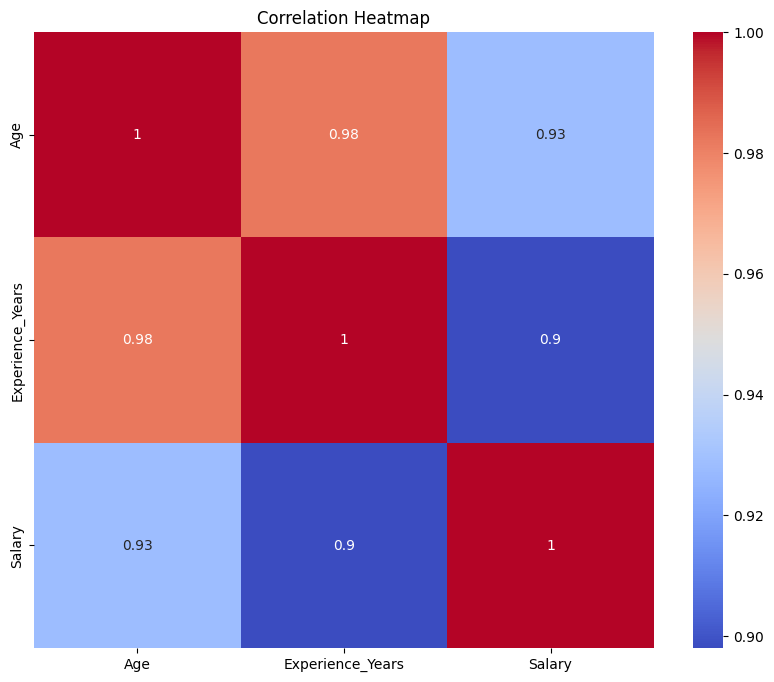

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Histogram**

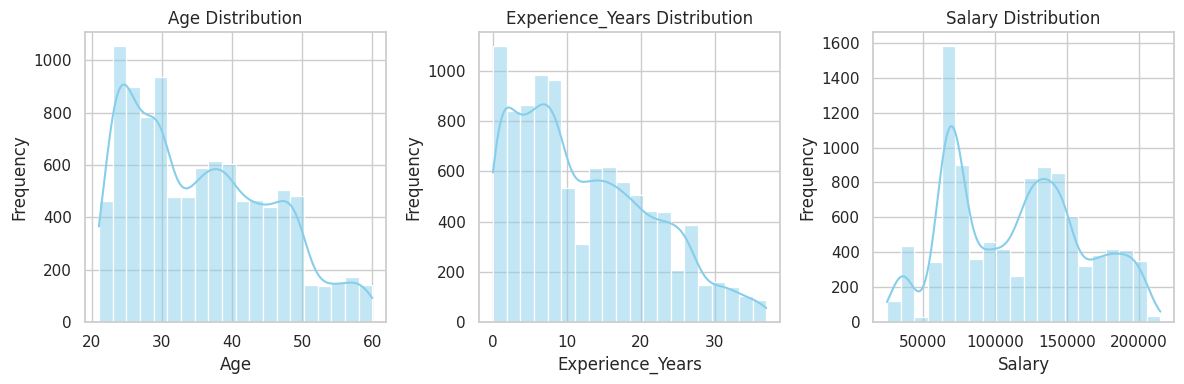

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,4))
columns = ['Age', 'Experience_Years', 'Salary']
for i,col in enumerate(columns,1):
  plt.subplot(1,3,i)
  sns.histplot(data=numeric_df,x=col,kde=True,bins = 20,color='skyblue')
  plt.title(f'{col} Distribution',fontsize = 12)
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


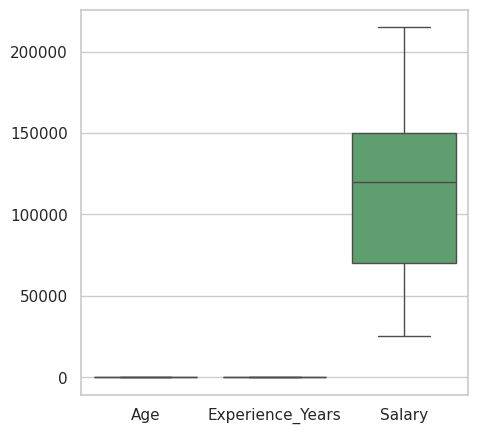

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=numeric_df, ax=ax)
plt.show()

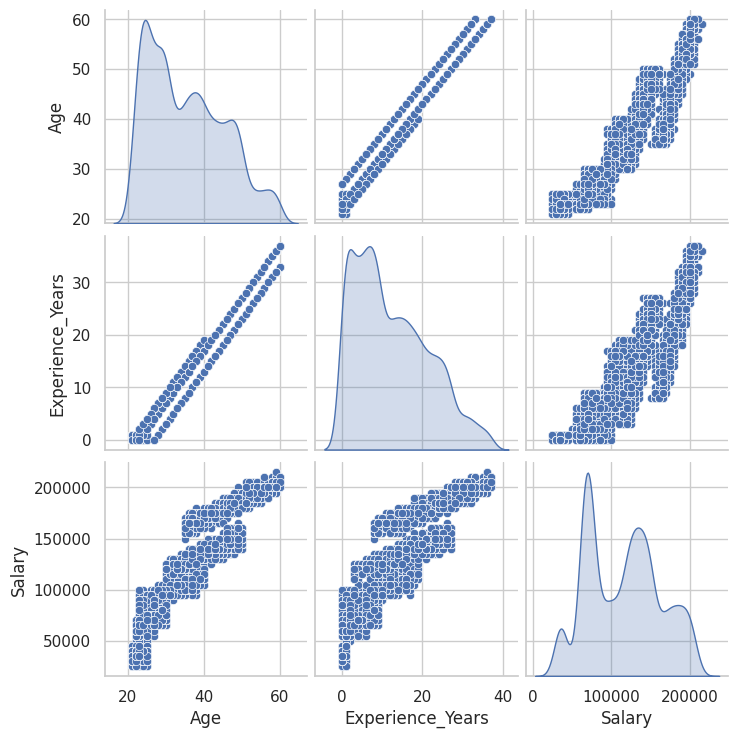

In [ ]:
sns.pairplot(df[['Age', 'Experience_Years', 'Salary']], diag_kind='kde')
plt.show()

**Dealing with categorical data**

In [ ]:
cat_col = df.select_dtypes(exclude=['number'])

In [ ]:
cat_list = cat_col.columns

cat_count = cat_col.shape[1]

print(f"Number of non-numerical columns: {cat_count}")
print("Non-numerical columns:", list(cat_list))

Number of non-numerical columns: 5
Non-numerical columns: ['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']


In [ ]:
cat_col.nunique()

,0
Gender,2
Department,6
Job_Title,5
Education_Level,3
Location,5


# Splitting the data

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location
0,24,Female,Engineering,Engineer,1,Master,Austin
1,56,Male,Sales,Executive,33,Master,Seattle
2,21,Male,Engineering,Intern,1,Bachelor,New York
3,30,Male,Finance,Analyst,9,Bachelor,New York
4,25,Female,HR,Analyst,2,Master,Seattle
...,...,...,...,...,...,...,...
9995,51,Male,Sales,Executive,28,Master,Austin
9996,36,Female,Sales,Executive,9,PhD,San Francisco
9997,57,Male,Sales,Executive,30,PhD,New York
9998,37,Female,Engineering,Manager,14,Master,New York


In [ ]:
y

,Salary
0,90000
1,195000
2,35000
3,75000
4,70000
...,...
9995,185000
9996,165000
9997,200000
9998,135000


# **One hot encoding**

In [ ]:
to_encode = [
    "Gender",
    "Location",
    "Department",
    "Job_Title",
    "Education_Level"]

x_encode = pd.get_dummies(x,columns = to_encode,drop_first=True,dtype = int)
x_encode.shape

(10000, 18)

In [ ]:
x_encode.head()

,Age,Experience_Years,Gender_Male,Location_Chicago,Location_New York,Location_San Francisco,Location_Seattle,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Master,Education_Level_PhD
0,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,56,33,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,21,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,9,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,25,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


# Train  and Test Division

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_encode,y,test_size=0.3,random_state=42)

# Standardization

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

# Model Training

In [ ]:
model = LinearRegression()
model.fit(x_train_norm,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test_norm)

# Model Evaluation

In [ ]:

r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
Accu = r2*100

print("Accuracy(R^2 %): ",round(Accu,2),"%")
print("MAE: ",round(mae,2))
print("RMSE: ",round(rmse,2))

Accuracy(R^2 %):  99.16 %
MAE:  3405.58
RMSE:  4246.37


In [ ]:

results = {
    "Metric": ["R² Score (%)", "MAE", "RMSE"],
    "Value": [r2*100, mae, rmse]
}

df_results = pd.DataFrame(results)
df_results["Value"] = df_results["Value"].apply(lambda x: f"{x:,.2f}")
print(df_results)


         Metric     Value
0  R² Score (%)     99.16
1           MAE  3,405.58
2          RMSE  4,246.37


# Predicted and Actual Salary plot

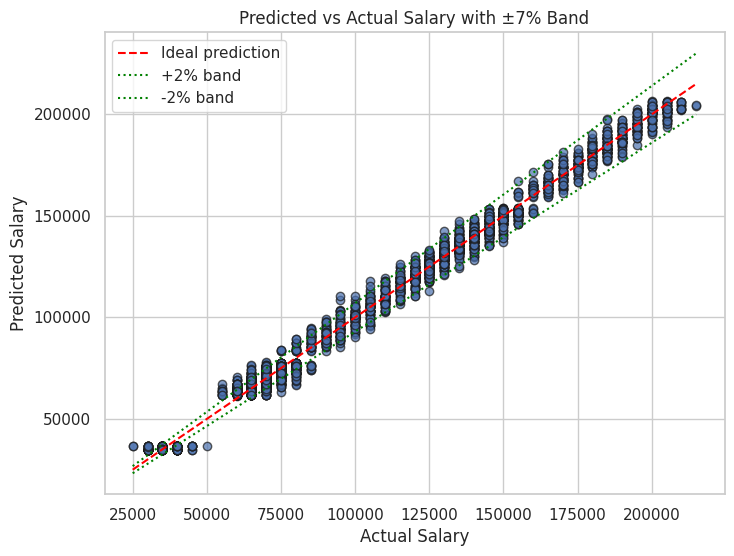

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.7, edgecolors='k')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salary with ±7% Band")

# Ideal prediction line
min_val = min(y_test.min(), y_predict.min())
max_val = max(y_test.max(), y_predict.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal prediction')

# ±2% tolerance band
upper_band = [val * 1.07 for val in np.linspace(min_val, max_val, 100)]
lower_band = [val * 0.93 for val in np.linspace(min_val, max_val, 100)]
plt.plot(np.linspace(min_val, max_val, 100), upper_band, color='green', linestyle=':', label='+2% band')
plt.plot(np.linspace(min_val, max_val, 100), lower_band, color='green', linestyle=':', label='-2% band')

plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter for ridge, value of alpha using gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {"alpha":[0.001,0.01,0.1,1,10,100]}
ridge_cv = GridSearchCV(ridge,params,cv = 5)
ridge_cv.fit(x_train_norm,y_train)

print("Best alpha:", ridge_cv.best_params_)
print("Best score (R²):", ridge_cv.best_score_)

Best alpha: {'alpha': 0.1}
Best score (R²): 0.9913169125256773


# Regularization Technique models

**1. Ridge Model**

In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_norm, y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_predict = ridge_model.predict(x_test_norm)

In [ ]:
ridge_predict

array([137575.35569632,  75586.63415809,  67320.05352785, ...,
       204091.28386486, 177371.3212305 ,  34943.14559622])

 **2. Lasso Model**

In [ ]:
lasso_model =  Lasso(alpha=0.1)
lasso_model.fit(x_train_norm, y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_predict = lasso_model.predict(x_test_norm)

In [ ]:

ridge_r2 = r2_score(y_test,ridge_predict)
ridge_mae = mean_absolute_error(y_test,ridge_predict)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_predict))

print("Ridge Model Evaluation:")
print(f"R^2 Score: {ridge_r2:.4f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")

Ridge Model Evaluation:
R^2 Score: 0.9916
MAE: 3405.77
RMSE: 4246.47


In [ ]:

lasso_r2 = r2_score(y_test,lasso_predict)
lasso_mae = mean_absolute_error(y_test,lasso_predict)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_predict))

print("Lasso Model Evaluation:")
print(f"R^2 Score: {lasso_r2:.4f}")
print(f"MAE: {lasso_mae:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")

Lasso Model Evaluation:
R^2 Score: 0.9916
MAE: 3414.35
RMSE: 4252.61



 MODEL PERFORMANCE

LinearRegression →  R2: 0.9916,  MAE: 3405.5846,  RMSE: 4246.3689
Ridge →  R2: 0.9916,  MAE: 3408.1296,  RMSE: 4247.5104
Lasso →  R2: 0.9916,  MAE: 3414.3476,  RMSE: 4252.6294

Best Model = LinearRegression

LinearRegression.pkl saved!


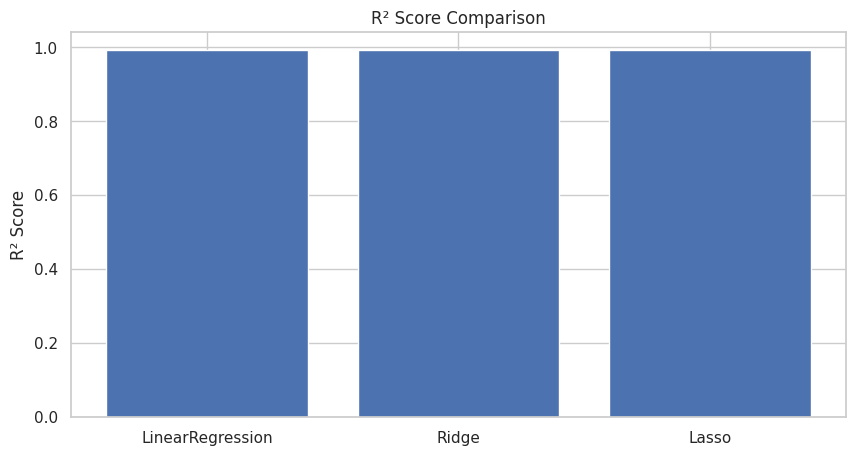

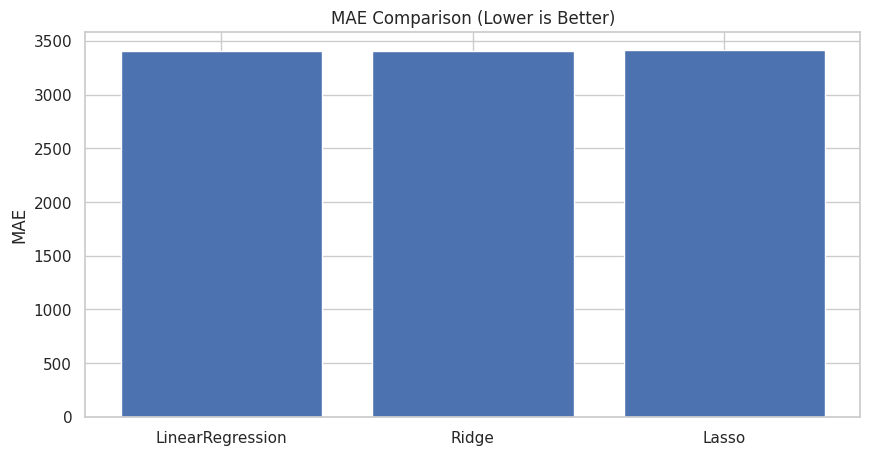

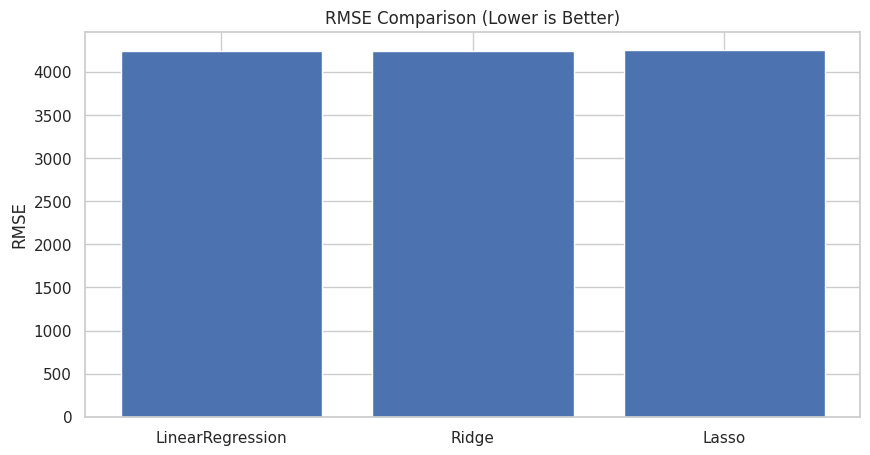

In [ ]:


models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01)
}

results = {}

for name, model in models.items():
    model.fit(x_train_norm, y_train)
    y_pred = model.predict(x_test_norm)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        "model": model,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    }

# ------------------------------
# 3. Print Evaluation Table
# ------------------------------
print("\n MODEL PERFORMANCE\n")
for name, r in results.items():
    print(f"{name} →  R2: {r['R2']:.4f},  MAE: {r['MAE']:.4f},  RMSE: {r['RMSE']:.4f}")

# ------------------------------
# 4. Select Best Model Using R2
# ------------------------------
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = results[best_model_name]["model"]

print(f"\nBest Model = {best_model_name}\n")

# ------------------------------
# 5. Save as .pkl file
# ------------------------------
file_name = f"{best_model_name}.pkl"   # <-- This creates Ridge.pkl, Lasso.pkl etc.

with open(file_name, "wb") as f:
    pickle.dump(best_model, f)

print(f"{file_name} saved!")


# ------------------------------
# 6. Plot Comparison of Models
# ------------------------------
r2_scores = [results[m]["R2"] for m in results]
mae_scores = [results[m]["MAE"] for m in results]
rmse_scores = [results[m]["RMSE"] for m in results]
model_names = list(results.keys())

plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_scores)
plt.title("MAE Comparison (Lower is Better)")
plt.ylabel("MAE")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores)
plt.title("RMSE Comparison (Lower is Better)")
plt.ylabel("RMSE")
plt.show()
